# Subjects Memory Performance Measurment

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#@title Figure settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

# Basic parameters

In [ ]:
# The download cells will store the data in nested directories starting here:
HCP_DIR = "../data"
if not os.path.isdir(HCP_DIR):
  os.mkdir(HCP_DIR)

# The data shared for NMA projects is a subset of the full HCP dataset
N_SUBJECTS = 339

# The acquisition parameters for all tasks were identical
TR = 0.72  # Time resolution, in sec

# Each experiment was repeated multiple times in each subject
N_RUNS_REST = 4
N_RUNS_TASK = 2

# You may want to limit the subjects used during code development.
# This will use all subjects:
subjects = range(N_SUBJECTS)

# Behavioral covariates


## Task performance measures

The dataset also includes aggregate behavior for each task run stored in task-specific `.csv` files. It is possible to load and work with these files using `numpy`:

In [ ]:
wm_behavior = np.genfromtxt(os.path.join(HCP_DIR, "hcp", "behavior", "wm.csv"),
                            delimiter=",",
                            names=True,
                            dtype=None,
                            encoding="utf")
print(wm_behavior[:5])
print(wm_behavior.dtype.names)

[(0, 0, '0BK_BODY', 1., 1., 1.,  705.5,  740.5, 696. )
 (0, 0, '0BK_FACE', 1., 1., 1.,  779.5,  765. , 915. )
 (0, 0, '0BK_PLACE', 1., 1., 1.,  926. ,  993.5, 811.5)
 (0, 0, '0BK_TOOL', 1., 1., 1.,  807.5,  807.5, 807.5)
 (0, 0, '2BK_BODY', 1., 1., 1., 1133. , 1205.5, 732.5)]
('Subject', 'Run', 'ConditionName', 'ACC', 'ACC_NONTARGET', 'ACC_TARGET', 'MEDIAN_RT', 'MEDIAN_RT_NONTARGET', 'MEDIAN_RT_TARGET')


But, while not formally taught as part of the course, [`pandas`](https://pandas.pydata.org/) offers more powerful tools for tabular data analysis.

### Measuring subjects memory performance:

In [ ]:
hcp_columns = ['Subject', 'Run', 'ConditionName', 'ACC', 'ACC_NONTARGET', 'ACC_TARGET', 'MEDIAN_RT', 'MEDIAN_RT_NONTARGET', 'MEDIAN_RT_TARGET']
result_columns = ['Subject', '0BK_ACC', '0BK_MEDIAN_RT', '2BK_ACC', '2BK_MEDIAN_RT']
df = pd.DataFrame(wm_behavior, columns=hcp_columns)

In [ ]:
def calculate_single_subject_performance_metrics(df, subject_id):
    subject_data = df[df['Subject'] == subject_id]

    zero_back = subject_data[subject_data['ConditionName'].str.startswith('0BK')]
    two_back = subject_data[subject_data['ConditionName'].str.startswith('2BK')]

    zero_back_acc = zero_back['ACC'].mean() if not zero_back.empty else None
    zero_back_rt = zero_back['MEDIAN_RT'].mean() if not zero_back.empty else None

    two_back_acc = two_back['ACC'].mean() if not two_back.empty else None
    two_back_rt = two_back['MEDIAN_RT'].mean() if not two_back.empty else None

    return pd.DataFrame([[subject_id, zero_back_acc, zero_back_rt, two_back_acc, two_back_rt]], columns=result_columns)

def calculate_memory_performance(df):
    subjects = df['Subject'].unique()
    performance_metrics = []

    for subject_id in subjects:
        subject_metrics = calculate_single_subject_performance_metrics(subject_id, df)
        performance_metrics.append(subject_metrics)

    performance_metrics_df = pd.concat(performance_metrics, ignore_index=True)
    return performance_metrics_df

In [ ]:
# calculate_single_subject_performance_metrics(df, 15)
memory_performance_metrics = calculate_memory_performance_per_subject(df)
print(memory_performance_metrics.head(20))

    Subject  0BK_ACC  0BK_MEDIAN_RT   2BK_ACC  2BK_MEDIAN_RT
0         0   1.0000       852.2500  0.921875      1054.4375
1         1   1.0000       529.0625  0.968750       865.5625
2         2   0.9875       584.1250  0.921875       940.5625
3         3   0.9750       731.7500  0.703125       798.0000
4         4   0.6750       852.8125  0.765625       864.0625
5         5   1.0000       699.5000  0.906250       996.0000
6         6   0.9500       697.3750  0.859375      1045.7500
7         7   0.7875       799.8125  0.671875       778.7500
8         8   0.7125      1012.0000  0.875000      1052.1250
9         9   0.6875       907.1875  0.640625       977.0625
10       10   0.7375      1018.3750  0.828125      1040.3750
11       11   0.9375       782.0625  1.000000       904.7500
12       12   1.0000       709.7500  0.875000      1092.2500
13       13   1.0000       883.5000  0.921875      1061.4375
14       14   0.9625       640.1250  0.781250      1019.1250
15       15   0.9250    

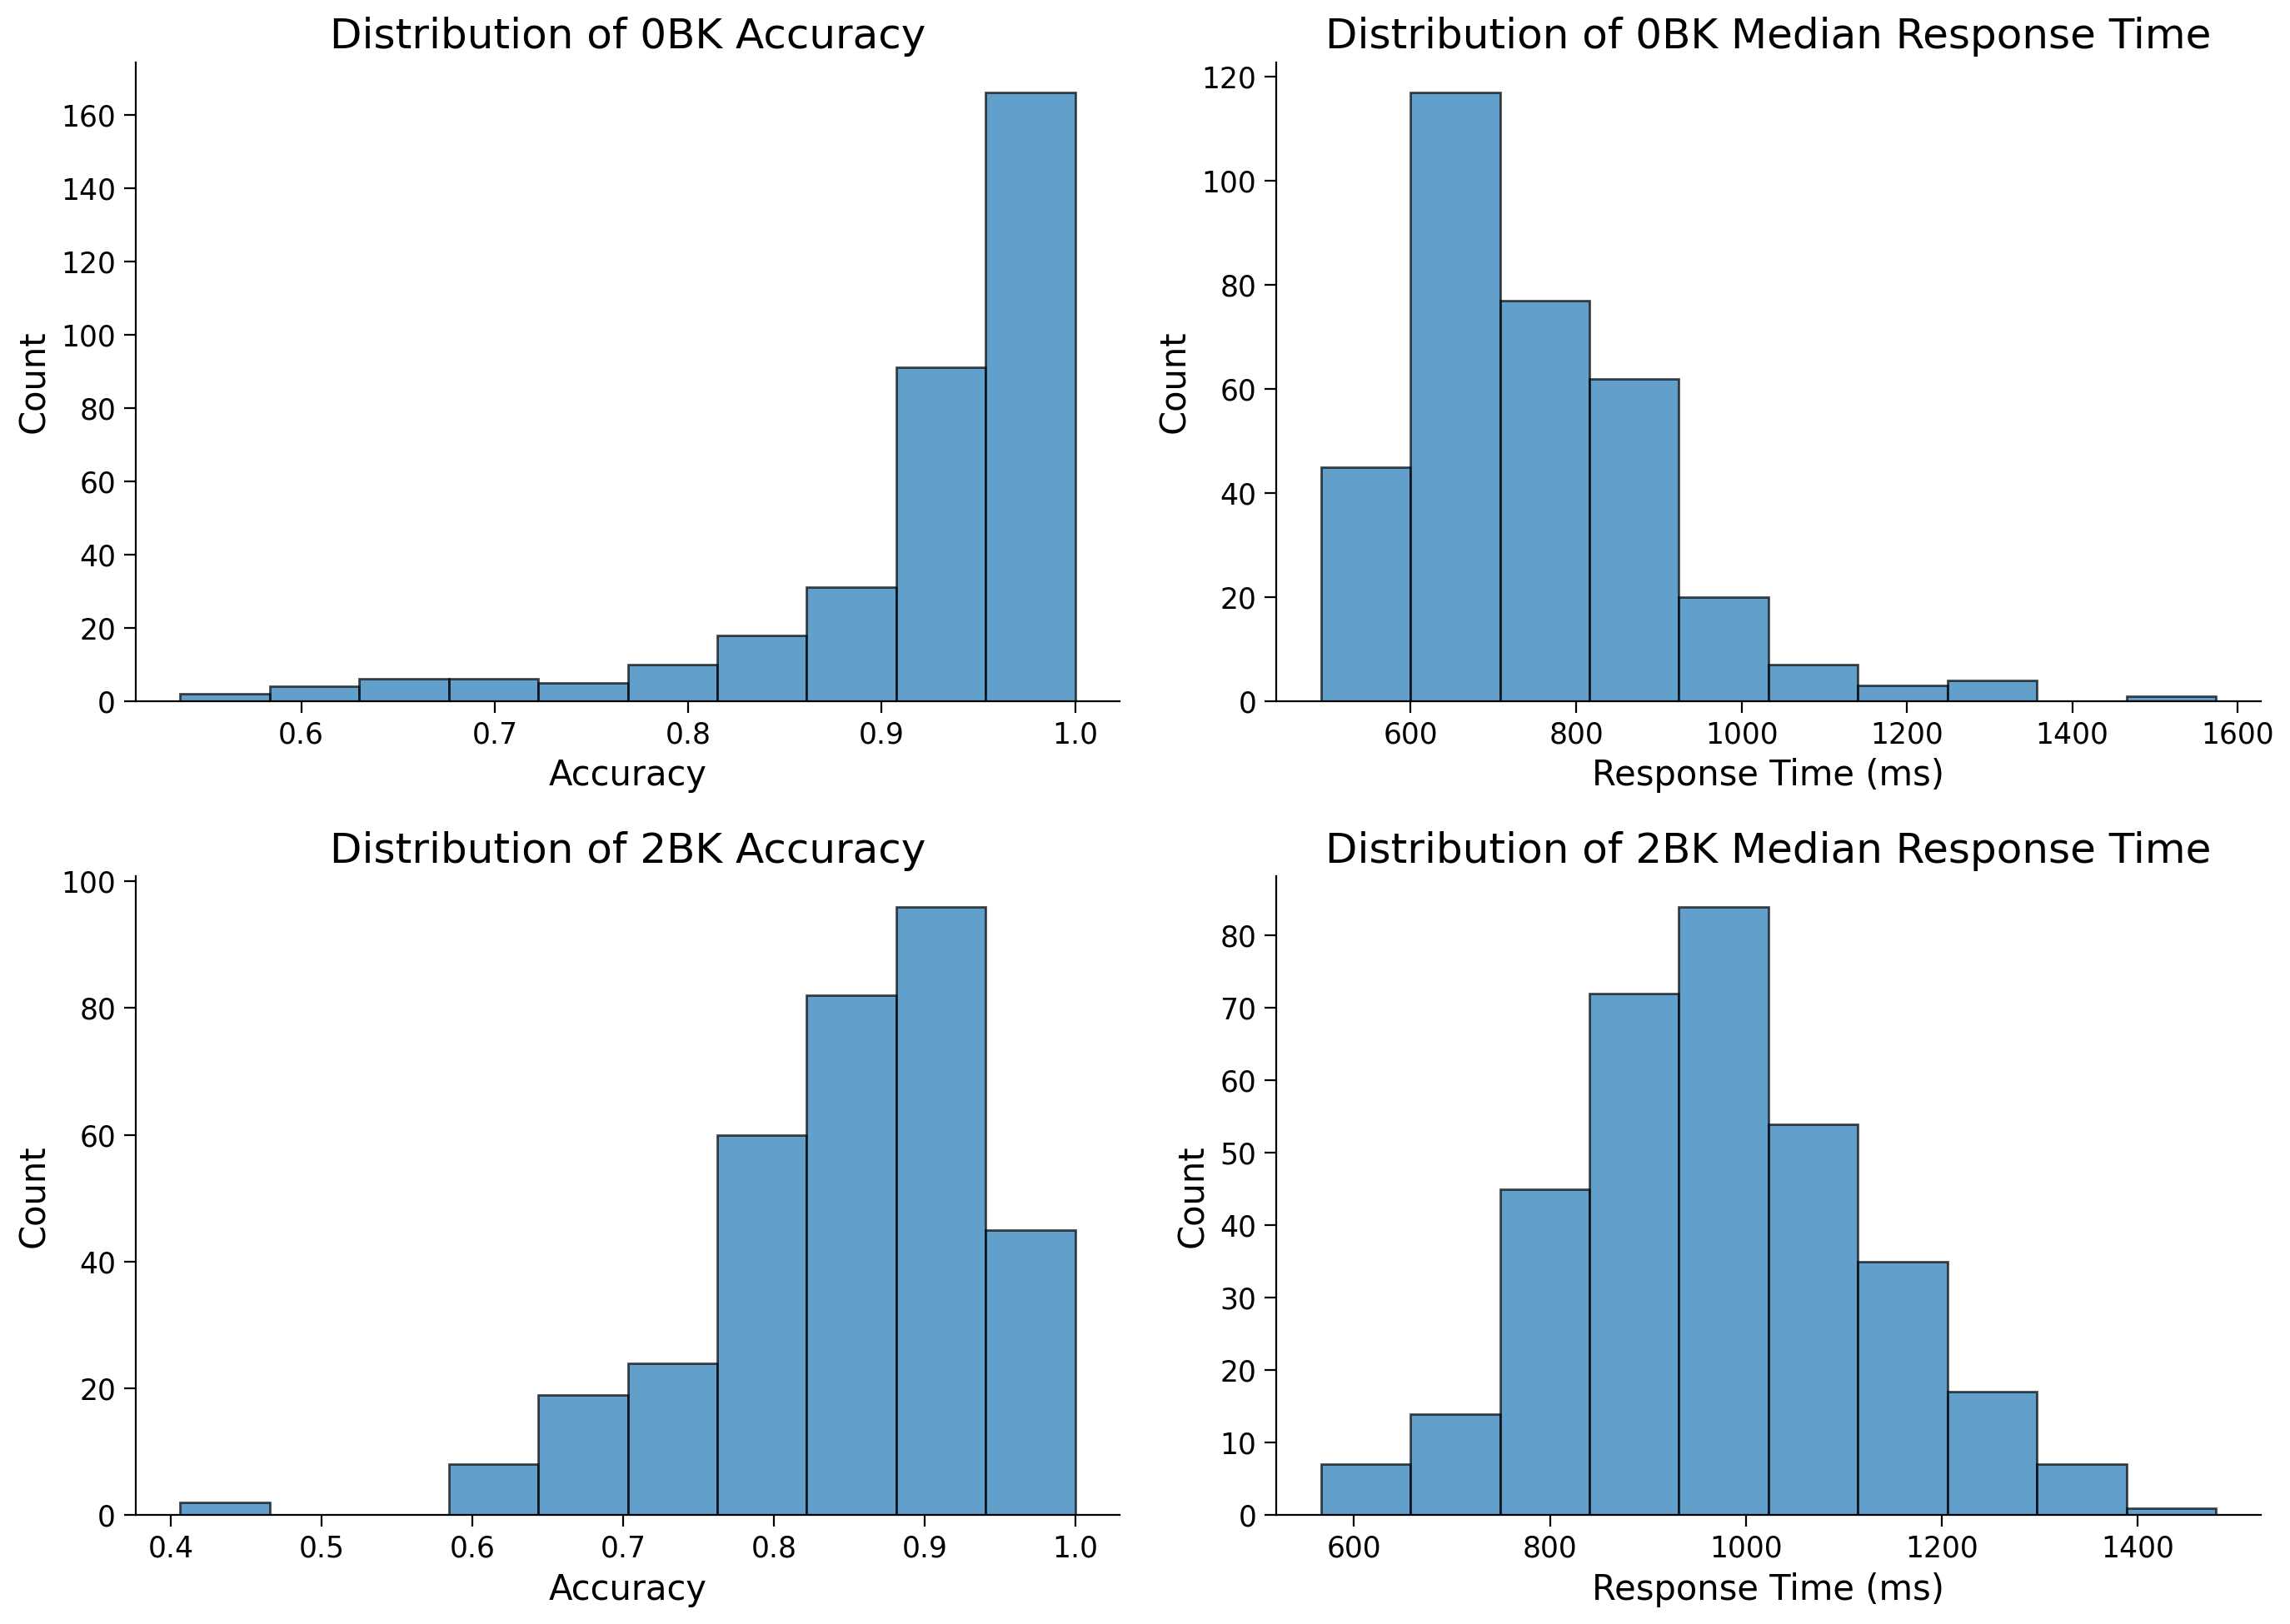

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot 0BK_ACC Histogram
axes[0, 0].hist(performance_metrics_per_subject['0BK_ACC'].dropna(), bins=10, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of 0BK Accuracy')
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_ylabel('Count')

# Plot 0BK_MEDIAN_RT Histogram
axes[0, 1].hist(performance_metrics_per_subject['0BK_MEDIAN_RT'].dropna(), bins=10, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of 0BK Median Response Time')
axes[0, 1].set_xlabel('Response Time (ms)')
axes[0, 1].set_ylabel('Count')

# Plot 2BK_ACC Histogram
axes[1, 0].hist(performance_metrics_per_subject['2BK_ACC'].dropna(), bins=10, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of 2BK Accuracy')
axes[1, 0].set_xlabel('Accuracy')
axes[1, 0].set_ylabel('Count')

# Plot 2BK_MEDIAN_RT Histogram
axes[1, 1].hist(performance_metrics_per_subject['2BK_MEDIAN_RT'].dropna(), bins=10, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribution of 2BK Median Response Time')
axes[1, 1].set_xlabel('Response Time (ms)')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

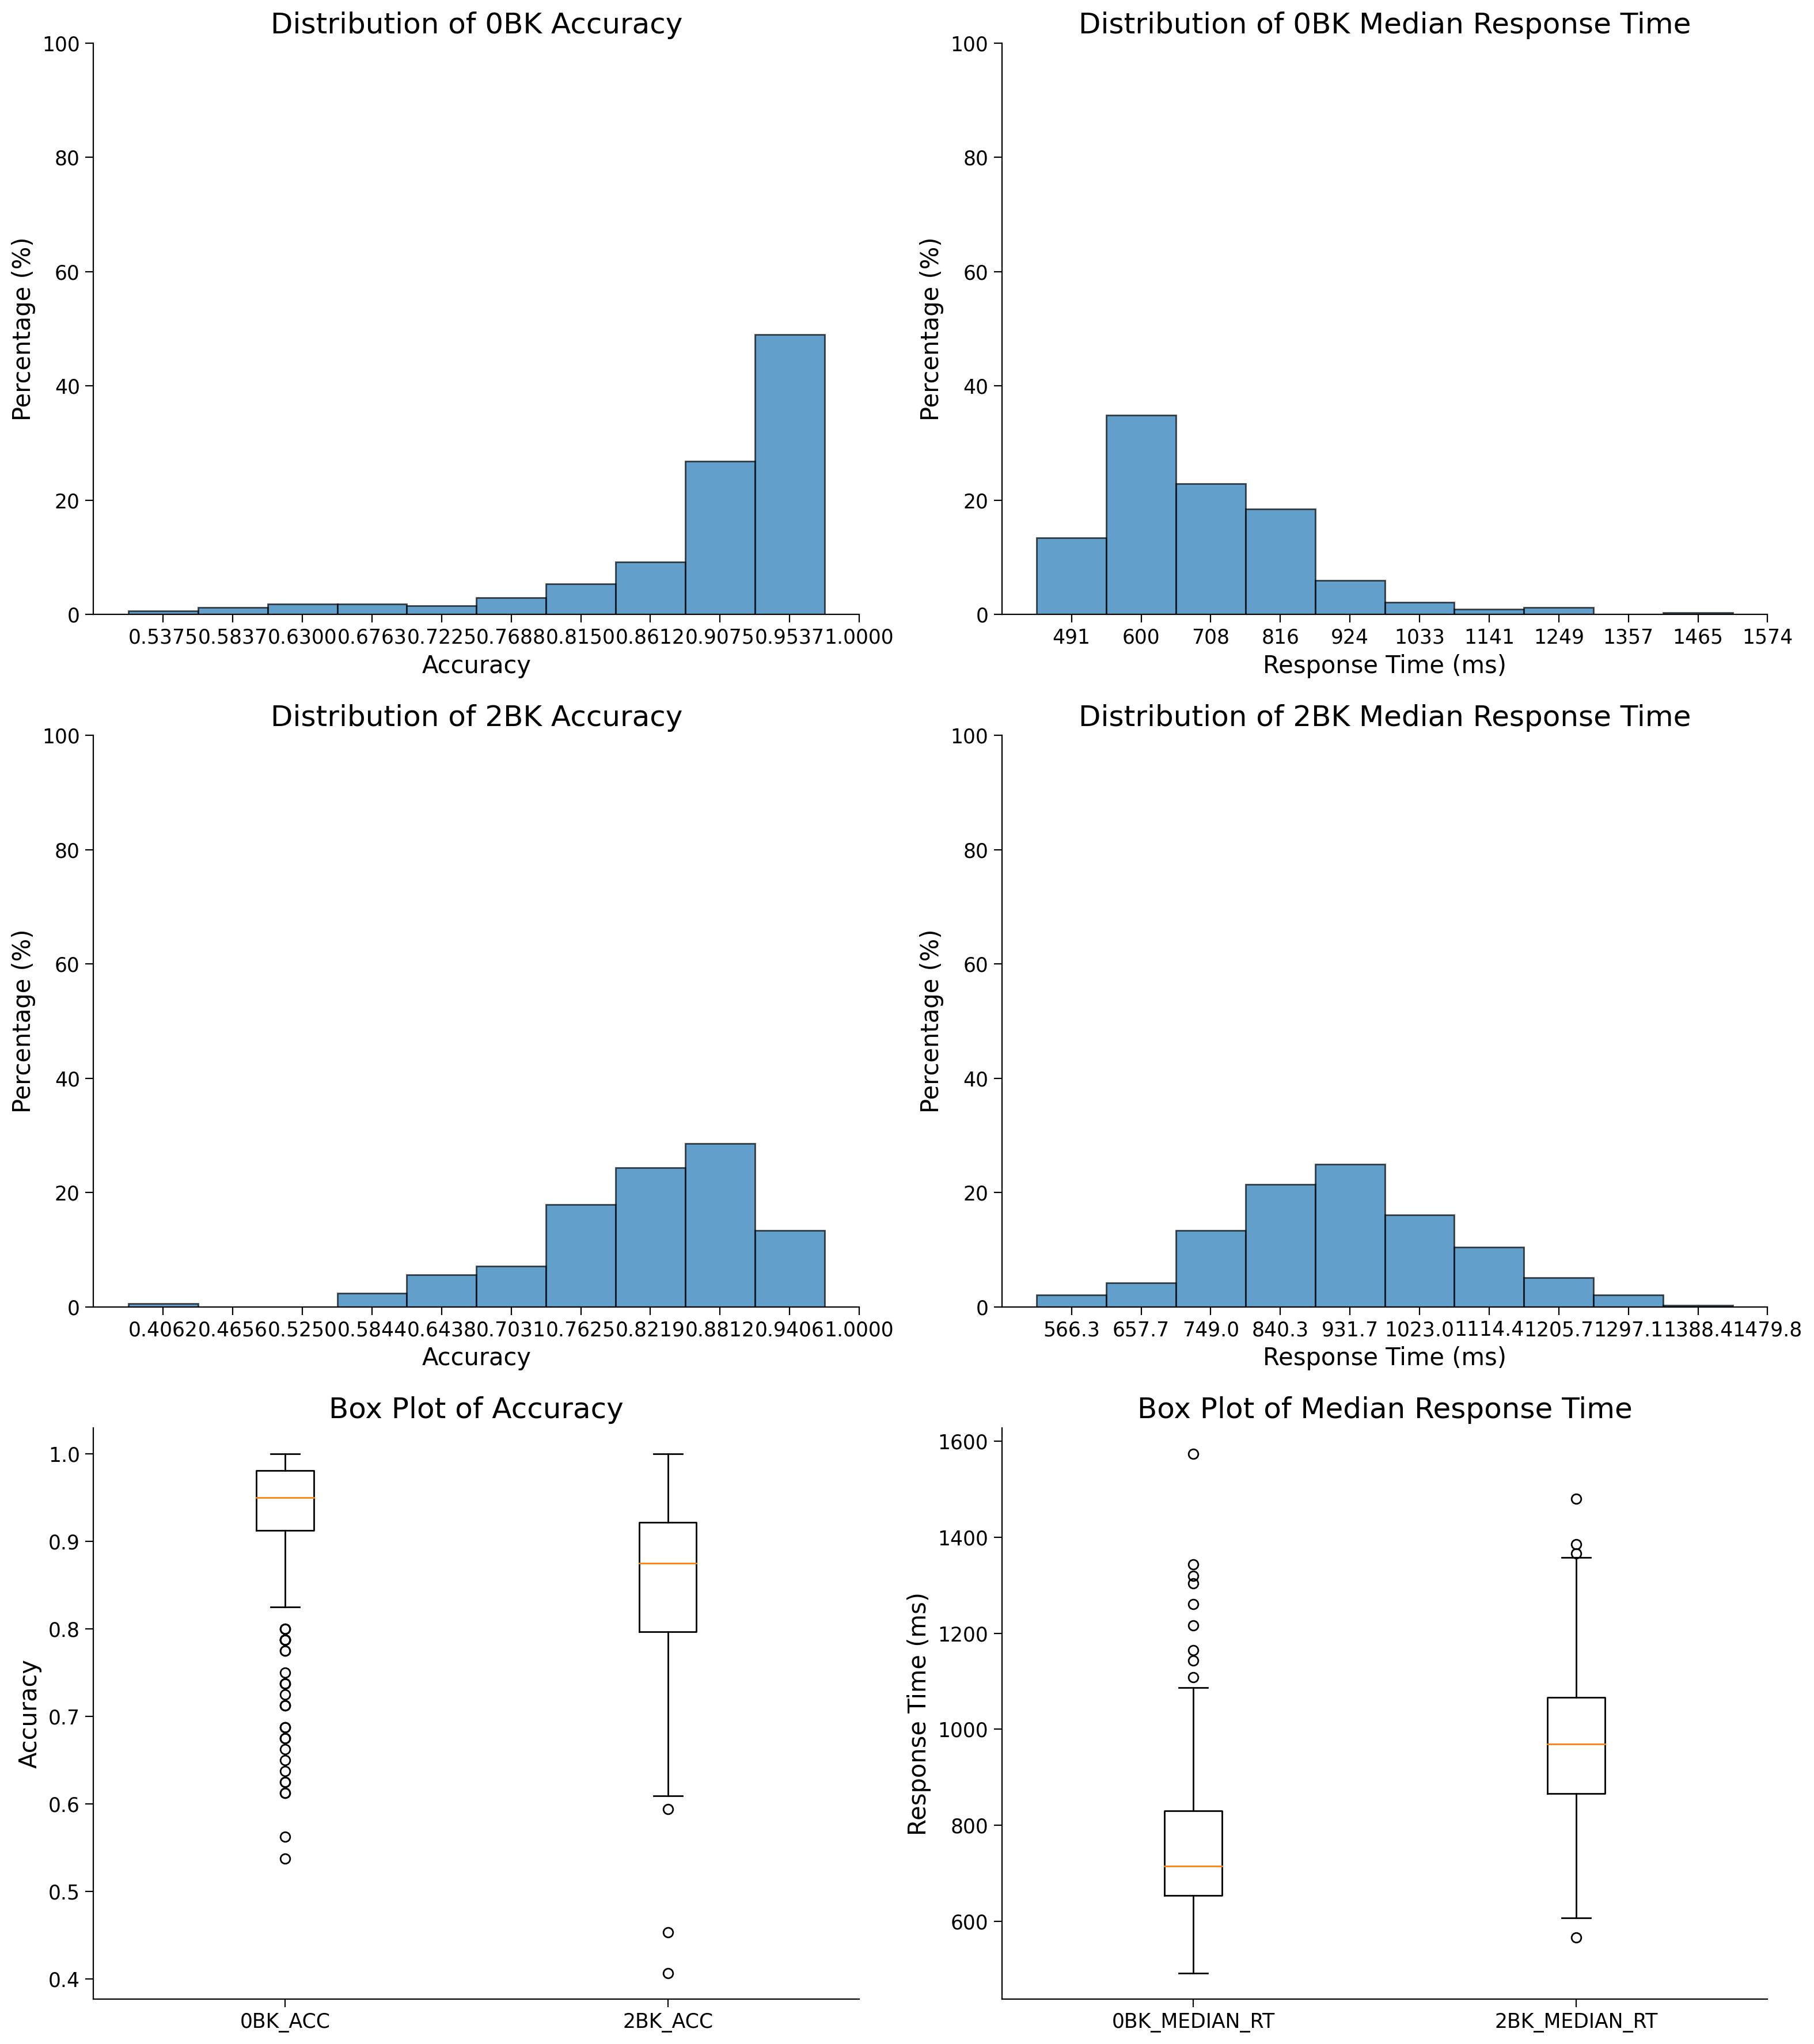

In [ ]:
# Plotting the performance metrics

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))

# Function to calculate histogram percentage
def plot_percentage_histogram(data, ax, title, xlabel, ylabel):
    counts, bins, patches = ax.hist(data.dropna(), bins=10, edgecolor='black', alpha=0.7)
    percentages = (counts / counts.sum()) * 100  # Calculate percentages
    ax.clear()  # Clear the histogram to replot with percentages
    ax.bar(bins[:-1], percentages, width=np.diff(bins), edgecolor='black', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim(0, 100)  # Set y-limit to 100% for better readability
    ax.set_xticks(bins)  # Set x-ticks to match bin edges for clarity

# Plot 0BK_ACC Histogram as percentage with doubled bins
plot_percentage_histogram(performance_metrics_per_subject['0BK_ACC'], axes[0, 0], 'Distribution of 0BK Accuracy', 'Accuracy', 'Percentage (%)')

# Plot 0BK_MEDIAN_RT Histogram as percentage with doubled bins
plot_percentage_histogram(performance_metrics_per_subject['0BK_MEDIAN_RT'], axes[0, 1], 'Distribution of 0BK Median Response Time', 'Response Time (ms)', 'Percentage (%)')

# Plot 2BK_ACC Histogram as percentage with doubled bins
plot_percentage_histogram(performance_metrics_per_subject['2BK_ACC'], axes[1, 0], 'Distribution of 2BK Accuracy', 'Accuracy', 'Percentage (%)')

# Plot 2BK_MEDIAN_RT Histogram as percentage with doubled bins
plot_percentage_histogram(performance_metrics_per_subject['2BK_MEDIAN_RT'], axes[1, 1], 'Distribution of 2BK Median Response Time', 'Response Time (ms)', 'Percentage (%)')

# Plot Box Plots
axes[2, 0].boxplot([performance_metrics_per_subject['0BK_ACC'].dropna(), performance_metrics_per_subject['2BK_ACC'].dropna()], labels=['0BK_ACC', '2BK_ACC'])
axes[2, 0].set_title('Box Plot of Accuracy')
axes[2, 0].set_ylabel('Accuracy')

axes[2, 1].boxplot([performance_metrics_per_subject['0BK_MEDIAN_RT'].dropna(), performance_metrics_per_subject['2BK_MEDIAN_RT'].dropna()], labels=['0BK_MEDIAN_RT', '2BK_MEDIAN_RT'])
axes[2, 1].set_title('Box Plot of Median Response Time')
axes[2, 1].set_ylabel('Response Time (ms)')

plt.tight_layout()
plt.show()


## Pseudo-demographics

The NMA-distributed version of the HCP data does not contain any real demographic information. But we have created a synthetic dataset of 25 "demographic" variables based on a model trained on the original dataset to predict demographics from resting-state network organization measures:

In [ ]:
demo = np.load(os.path.join(HCP_DIR, "hcp", "pseudo_demographics.npy"))
demo.shape

'float64'

## Original subject IDs

The dataset also contains a key to map the ordinal subject numbers to the IDs used in the original HCP dataset:

In [ ]:
ids = np.loadtxt(os.path.join(HCP_DIR, "hcp", "orig_ids.txt"))
print(ids[:8])

[199453. 580751. 173435. 919966. 181636. 192843. 894067. 174437.]
